In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [180]:
# Read in data
df = pd.read_csv('C:/Users/abdir/Downloads/archive (46)/Reviews.csv')
print(df.shape)
df = df.head(50000)
print(df.shape)

(568454, 10)
(50000, 10)


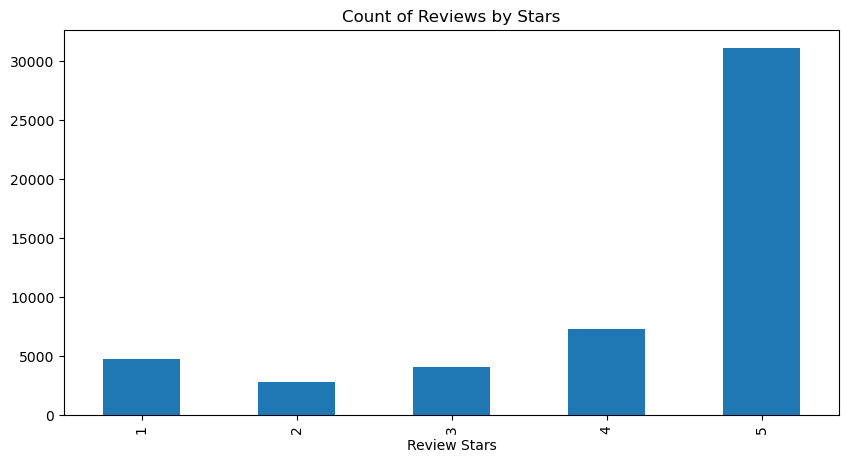

In [181]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49997 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [183]:
df.tail(n=2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...
49999,50000,B00430B73W,A3042WJDYJ22S8,"Sunny Side Up ""CoffeeBuzz""",0,0,5,1178755200,Very Tasty and Healthy.,"These are very good; nutritious, great flavor ..."


In [184]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [185]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [186]:
tokenizer = Tokenizer(num_words=None,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,split=' ',char_level=False,oov_token=None,analyzer=None)

In [187]:
tokenizer.fit_on_texts(corpus)

In [188]:
word_index = tokenizer.word_index
# print(word_index)

In [189]:
sequences = tokenizer.texts_to_sequences(corpus)

In [190]:
# sequences

In [191]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [192]:
padded = pad_sequences(sequences, truncating='post')
padded

array([[   0,    0,    0, ...,  836,    6,   38],
       [   0,    0,    0, ..., 2687,    6, 3609],
       [   0,    0,    0, ..., 1571, 1355, 6407],
       ...,
       [   0,    0,    0, ...,   98,  515,   85],
       [   0,    0,    0, ..., 1297,  194,  281],
       [   0,    0,    0, ...,  153, 1665,  511]])

In [193]:
import nltk
nltk.download('vader_lexicon')
vaders = 42  # Example
# from some_module import vaders

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abdir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [194]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [195]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [196]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [197]:
training_features = padded
training_labels = df.iloc[:, 6].values

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_features = sc.fit_transform(training_features)

In [199]:
training_labels

array([5, 1, 4, ..., 5, 4, 5], dtype=int64)

In [200]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [201]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [202]:
history = model.fit(training_features, training_labels,  validation_split=0.2,epochs=100)

Epoch 1/100
1250/1250 [==============================] - 14s 7ms/step - loss: 1.1868 - accuracy: 0.6255 - val_loss: 1.2419 - val_accuracy: 0.6048
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2904 - accuracy: 0.6266 - val_loss: 1.2088 - val_accuracy: 0.6045
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2114 - accuracy: 0.6274 - val_loss: 1.2497 - val_accuracy: 0.6031
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1949 - accuracy: 0.6298 - val_loss: 1.2325 - val_accuracy: 0.6030
Epoch 5/100
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1057 - accuracy: 0.6365 - val_loss: 1.2386 - val_accuracy: 0.6011
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0716 - accuracy: 0.6453 - val_loss: 1.3054 - val_accuracy: 0.5964
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0484 - accuracy: 0.6547 - val_loss: 1.3428 - val_a